In [1]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import pandas as pd

In [113]:
data = pd.read_csv('data.csv')
T1 = np.array(data['T'])
Sigma1 = np.array(data.Sigma)
data.insert(4,'LnSigma', np.log(Sigma1)  , True)

Ln = data.LnSigma

data

,U,R2,T,Sigma,LnSigma
0,0.320,226,280.804878,4.086526,1.407695
1,0.285,222,279.951220,4.160157,1.425553
2,0.315,217,280.682927,4.256013,1.448333
3,0.405,208,282.878049,4.440168,1.490692
4,0.475,200,284.585366,4.617774,1.529913
5,0.525,190,285.804878,4.860815,1.581206
6,0.675,173,289.463415,5.338467,1.674939
7,0.855,151,293.853659,6.116257,1.810950
8,0.975,139,296.780488,6.644279,1.893756
9,1.085,126,299.463415,7.329800,1.991948


a =  -3409.801290830143
b =  13.343124201327827
sigma_a =  33.50255715638107
sigma_b =  0.10080794651995528
S_e =  0.020063540378996332
Relative S_r a = %  0.9825369368730754
Relative S_r b = %  0.7555048203023059
<ipython-input-114-d04593552e41>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph1.png', dpi=400, quality=100)


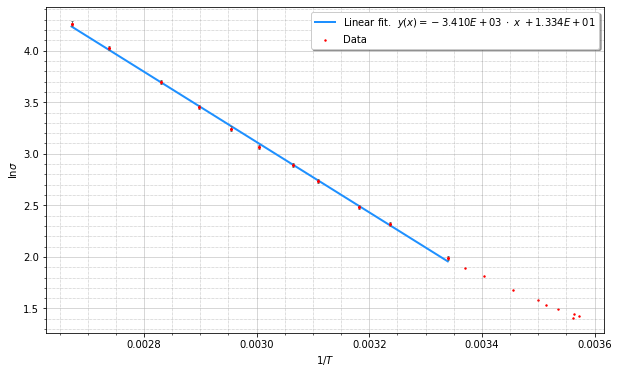

In [114]:
Y = Ln[9:]
X = 1/(T1[9:])
Y_f = Ln
X_f = 1/T1

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X_f, Y_f, s = 2, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \;+ {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$\ln{\sigma}$')
ax.set_xlabel(r'$1/T$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph1.png', dpi=400, quality=100)
plt.show()

In [115]:
k_b = 8.617*10**(-5)
delta = -2*k_b*a
delta

0.5876451544616669

In [116]:
sigma_a/abs(a) * delta

0.005773830700330715

a =  -3724.0832426451007
b =  14.188701296995001
c =  1.6337231367603398
sigma_a =  16.34087033802026
sigma_b =  0.04375415356174784
sigma_c =  0.07662469223091664
S_e =  0.12845879130113227
Relative S_r a = %  0.4387890729964953
Relative S_r b = %  0.3083732094001757
Relative S_r c = %  4.6901883499589045
<ipython-input-117-4fd2224e8ac4>:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph2.png', dpi=400, quality=100)


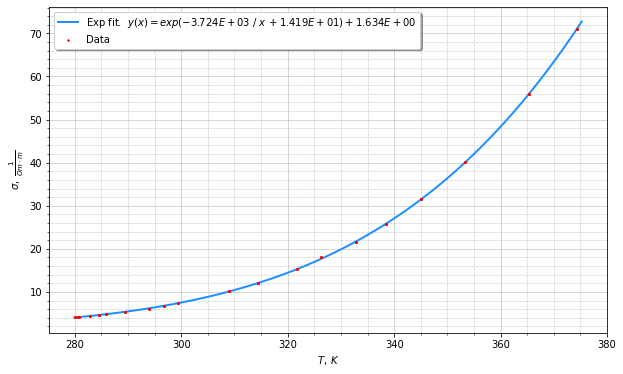

In [117]:
Y = Sigma1
X = T1

def approx(x, a, b, c):
    return np.exp(a/x + b) + c
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]

print('a = ', a)
print('b = ', b)
print('c = ', c)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

rel_a = 100* sigma_a/abs(a)
rel_b = 100* sigma_b/abs(b)
rel_c = 100* sigma_c/abs(c)

print('Relative S_r a = % ', rel_a)
print('Relative S_r b = % ', rel_b)
print('Relative S_r c = % ', rel_c)

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(min(X),max(X)+1,0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 2, c = 'r')
lgnd = ax.legend([r'Exp fit.  $y(x) = exp({:.3E} \; / \; x \;+ {:.3E}) + {:.3E}$'.format(a, b, c), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$\sigma, \; \frac{1}{Om \cdot m}$')
ax.set_xlabel(r'$T, \; K$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph2.png', dpi=400, quality=100)
plt.show()

In [111]:
k_b = 8.617*10**(-5)
delta = -2*k_b*a
delta

0.6418085060374568

In [112]:
sigma_a/abs(a) * delta

0.002816185594054412

In [121]:
data2 = pd.read_csv('data2.csv')
T2 = np.array(data2['TC'])
Sigma2 = np.array(data2.Sigma)
data2.insert(3,'LnSigma', np.log(Sigma2)  , True)
data2.insert(4,'1/T', 1/T  , True)
LnSigma = data2.LnSigma

l = 26.6/1000
S = np.pi * 0.07/(4*1000)
Sigma_cup = l/(data2.R_cup*1000*S)
data2

,TC,TK,Sigma,LnSigma,1/T,R_cup
0,38.414634,311.414634,10.408385,2.342612,0.026032,0.13728
1,39.634146,312.634146,11.357872,2.429911,0.025231,0.13762
2,42.073171,315.073171,12.593762,2.533202,0.023768,0.13888
3,44.512195,317.512195,14.557212,2.678087,0.022466,0.14048
4,46.951220,319.951219,16.370707,2.795494,0.021299,0.14145
5,49.390244,322.390244,18.422456,2.913570,0.020247,0.14150
6,53.048780,326.048781,21.087691,3.048689,0.018851,0.14327
7,57.926829,330.926829,26.153802,3.263995,0.017263,0.14560
8,62.804878,335.804878,31.727563,3.457186,0.015922,0.14816
9,67.682927,340.682927,38.265449,3.644547,0.014775,0.15049


a =  -3821.3742157427246
b =  14.983743548306586
c =  -4.704457278255357
sigma_a =  43.69280406491926
sigma_b =  0.111614226279413
sigma_c =  0.6447749796719754
S_e =  0.5426634803038627
Relative S_r a = %  1.143379360359951
Relative S_r b = %  0.744902139572639
Relative S_r c = %  13.705618768230996
<ipython-input-101-3552bd8f8bf4>:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph3.png', dpi=400, quality=100)


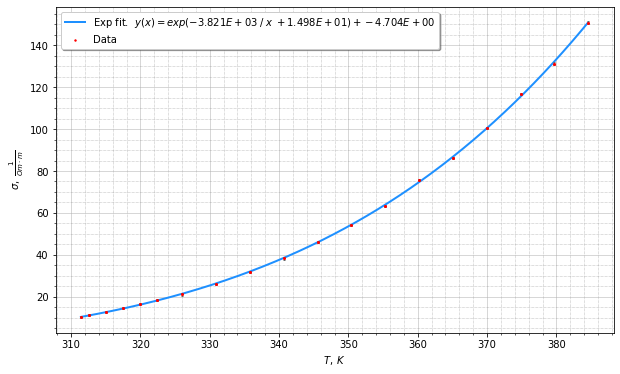

In [101]:
Y = Sigma2
X = T2 +273

def approx(x, a, b, c):
    return np.exp(a/x + b) + c
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]

print('a = ', a)
print('b = ', b)
print('c = ', c)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

rel_a = 100* sigma_a/abs(a)
rel_b = 100* sigma_b/abs(b)
rel_c = 100* sigma_c/abs(c)

print('Relative S_r a = % ', rel_a)
print('Relative S_r b = % ', rel_b)
print('Relative S_r c = % ', rel_c)

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(min(X),max(X),0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 2, c = 'r')
lgnd = ax.legend([r'Exp fit.  $y(x) = exp({:.3E} \; / \; x \;+ {:.3E}) + {:.3E}$'.format(a, b, c), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$\sigma, \; \frac{1}{Om \cdot m}$')
ax.set_xlabel(r'$T, \; K$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph3.png', dpi=400, quality=100)
plt.show()

In [102]:
k_b = 8.617*10**(-5)
delta = -2*k_b*a
delta

0.6585756323411013

In [103]:
sigma_a/abs(a) * delta

0.0075300178525481865

a =  -4345.051101507435
b =  16.36351754948213
sigma_a =  39.27029334974412
sigma_b =  0.1152747766653665
S_e =  0.03224367588880199
Relative S_r a = %  0.9037935902783749
Relative S_r b = %  0.7044620835146457
<ipython-input-98-64cc60c0ca29>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph4.png', dpi=400, quality=100)


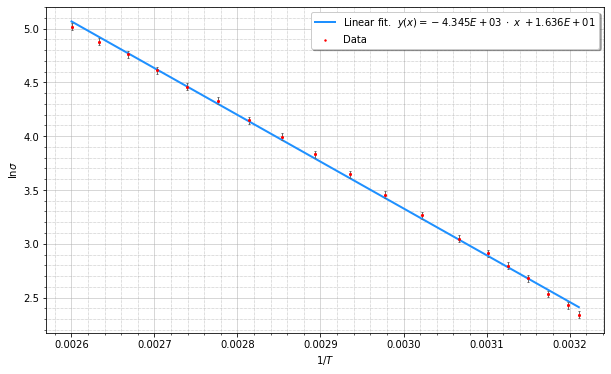

In [98]:
Y = LnSigma
X = 1/(T2+273)

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 2, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \; + {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$\ln{\sigma}$')
ax.set_xlabel(r'$1/T$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph4.png', dpi=400, quality=100)
plt.show()

In [99]:
k_b = 8.617*10**(-5)
delta = -2*k_b*a
delta

0.7488261068337915

In [100]:
sigma_a/abs(a) * delta

0.006767842355894902

a =  -0.00974082066428841
b =  3.886032282089256
sigma_a =  0.00013010493526570375
sigma_b =  0.009619336837742245
S_e =  0.012675412513432944
Relative S_r a = %  1.3356670833977236
Relative S_r b = %  0.24753620504075122
<ipython-input-128-731912e5fe47>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph5.png', dpi=400, quality=100)


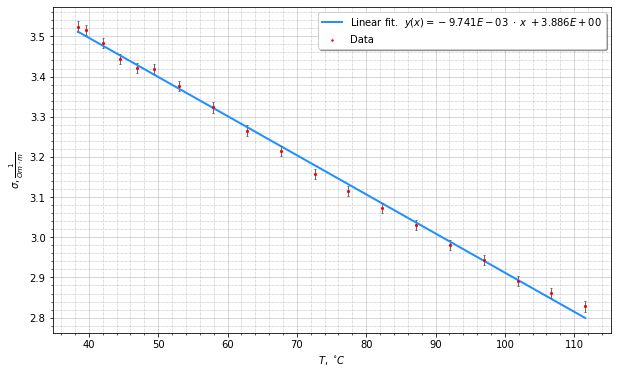

In [128]:
Y = Sigma_cup
X = T2

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 2, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \;+ {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$\sigma, \frac{1}{Om \cdot m}$')
ax.set_xlabel(r'$T, \; ^{\circ}C$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph5.png', dpi=400, quality=100)
plt.show()

In [129]:
-a/min(Sigma_cup)

0.0034447034659931906

In [130]:
-a/Sigma_cup[0] * sigma_a/abs(a)

3.691537854454169e-05

a =  0.4692547195558049
b =  118.94874670271071
sigma_a =  0.0036446641122473192
sigma_b =  0.26946903638288405
S_e =  0.35507968961864284
Relative S_r a = %  0.7766920523883803
Relative S_r b = %  0.22654214008355175
<ipython-input-122-7ab8eba7e845>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph6.png', dpi=400, quality=100)


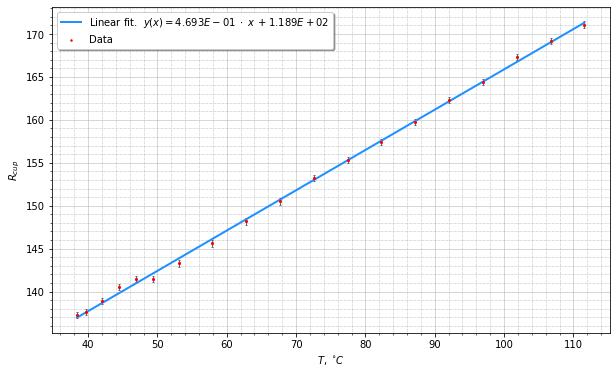

In [122]:
Y = data2.R_cup * 1000
X = T 

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 2, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \;+ {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$R_{cup}$')
ax.set_xlabel(r'$T, \; ^{\circ}C$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph6.png', dpi=400, quality=100)
plt.show()

In [123]:
a/data2.R_cup[0]

3.418230765995082